<a href="https://colab.research.google.com/github/CodeWithSridhar/Credit_Card_Default_Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [175]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc


In [2]:
df = pd.read_excel('https://github.com/CodeWithSridhar/Credit_Card_Default_Prediction/blob/main/default%20of%20credit%20card%20clients.xls?raw=true',header = 1)

In [3]:
df.head()

ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
0   1      20000    2  ...         0         0                           1
1   2     120000    2  ...         0      2000                           1
2   3      90000    2  ...      1000      5000                           0
3   4      50000    2  ...      1069      1000                           0
4   5      50000    1  ...       689       679                           0

[5 rows x 25 columns]

In [4]:
df.tail()

ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
29995  29996     220000    1  ...      5000      1000                           0
29996  29997     150000    1  ...         0         0                           0
29997  29998      30000    1  ...      2000      3100                           1
29998  29999      80000    1  ...     52964      1804                           1
29999  30000      50000    1  ...      1000      1000                           1

[5 rows x 25 columns]

In [5]:
df.describe()

ID       LIMIT_BAL  ...       PAY_AMT6  default payment next month
count  30000.000000    30000.000000  ...   30000.000000                30000.000000
mean   15000.500000   167484.322667  ...    5215.502567                    0.221200
std     8660.398374   129747.661567  ...   17777.465775                    0.415062
min        1.000000    10000.000000  ...       0.000000                    0.000000
25%     7500.750000    50000.000000  ...     117.750000                    0.000000
50%    15000.500000   140000.000000  ...    1500.000000                    0.000000
75%    22500.250000   240000.000000  ...    4000.000000                    0.000000
max    30000.000000  1000000.000000  ...  528666.000000                    1.000000

[8 rows x 25 columns]

In [6]:
df.shape

(30000, 25)

## Features Description

We have records of 30000 customers. Below are the description of all features:

    ID: ID of each client

    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

    SEX: Gender (1 = male, 2 = female)

    EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

    MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

    AGE: Age in years


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

    PAY_0: Repayment status in September, 2005 (scale same as above)

    PAY_2: Repayment status in August, 2005 (scale same as above)

    PAY_3: Repayment status in July, 2005 (scale same as above)

    PAY_4: Repayment status in June, 2005 (scale same as above)

    PAY_5: Repayment status in May, 2005 (scale same as above)

    PAY_6: Repayment status in April, 2005 (scale same as above)

    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

    default.payment.next.month: Default payment (1=yes, 0=no)

In our dataset, we got customer credit card transaction history for past 6 months, on basis of which we have to predict if cutomer will default or not.

## Handling Missing / Null / Duplicate Values

In [8]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

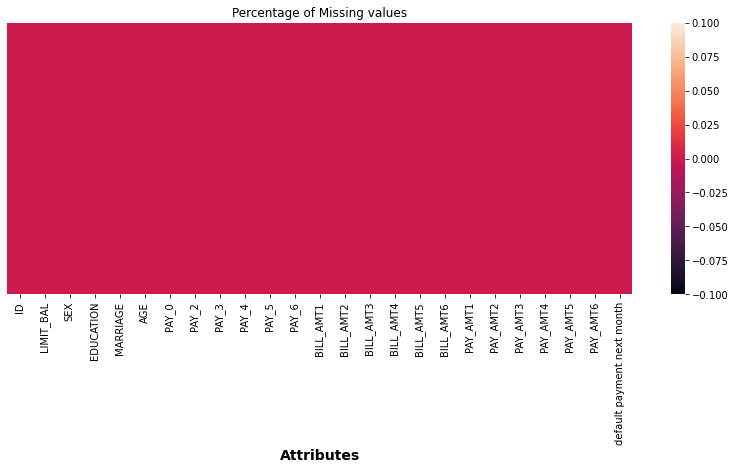

In [9]:
# plt.figure(figsize=(18,6))
# missing = pd.DataFrame(df.isnull().sum())
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Attributes", size=14, weight="bold")
plt.title("Percentage of Missing values")
plt.show()

In [10]:
duplicates = len(df[df.duplicated()])
print(duplicates)

0


No missing or null values or duplicates are found in our dataset.

# **Exploratory Data Analysis**

## Dependent Variable

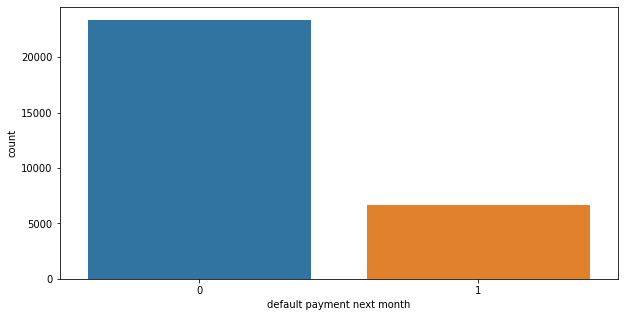

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'default payment next month', data = df)

In [12]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

Here, 

    0 - Not Default
    1 - Default

so we can conclude that, Defaulters are less as compare to the Non-Defaulters in the given dataset.



# Independent Variable

In [13]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

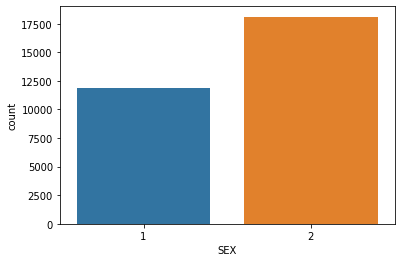

In [14]:
sns.countplot(x = 'SEX', data = df)

In [15]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [16]:
df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

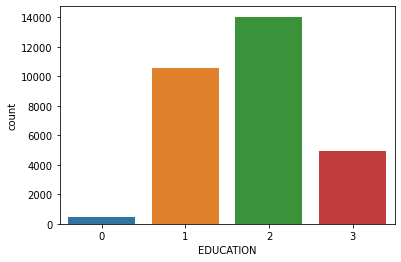

In [17]:
sns.countplot(x = 'EDUCATION', data = df)

In [18]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [19]:
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

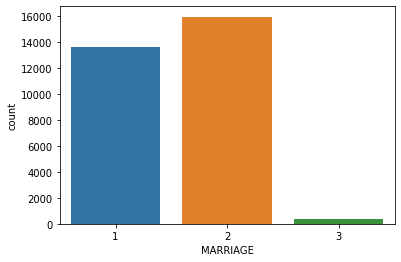

In [20]:
sns.countplot(x = 'MARRIAGE', data = df)

In [21]:
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64

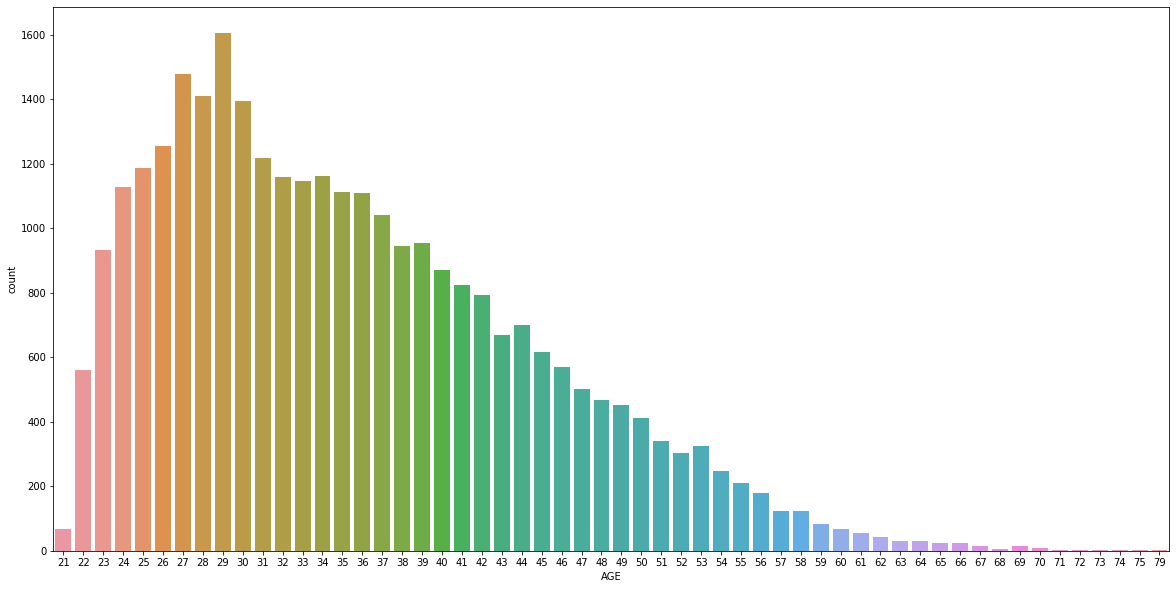

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'AGE', data = df)
plt.show()

Limit Balance

In [23]:
df['LIMIT_BAL'].shape

(30000,)

In [24]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


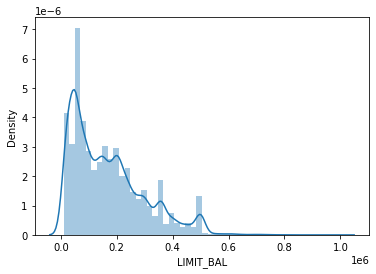

In [25]:
sns.distplot(df['LIMIT_BAL'], kde=True)

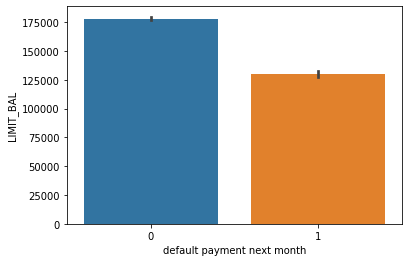

<Figure size 1080x576 with 0 Axes>

In [26]:
sns.barplot(x='default payment next month', y='LIMIT_BAL', data=df)
plt.figure(figsize=(15,8))
plt.show()

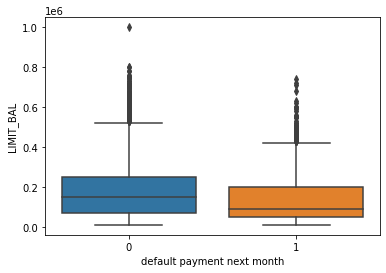

In [27]:
ax = sns.boxplot(x="default payment next month", y="LIMIT_BAL", data = df)

Renaming Columns 

In [28]:
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [29]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'default payment next month'],
      dtype='object')

In [30]:
df.head(10)

ID  LIMIT_BAL  SEX  ...  PAY_AMT_MAY  PAY_AMT_APR  default payment next month
0   1      20000    2  ...            0            0                           1
1   2     120000    2  ...            0         2000                           1
2   3      90000    2  ...         1000         5000                           0
3   4      50000    2  ...         1069         1000                           0
4   5      50000    1  ...          689          679                           0
5   6      50000    1  ...         1000          800                           0
6   7     500000    1  ...        13750        13770                           0
7   8     100000    2  ...         1687         1542                           0
8   9     140000    2  ...         1000         1000                           0
9  10      20000    1  ...         1122            0                           0

[10 rows x 25 columns]

In [31]:
df.describe()

ID       LIMIT_BAL  ...    PAY_AMT_APR  default payment next month
count  30000.000000    30000.000000  ...   30000.000000                30000.000000
mean   15000.500000   167484.322667  ...    5215.502567                    0.221200
std     8660.398374   129747.661567  ...   17777.465775                    0.415062
min        1.000000    10000.000000  ...       0.000000                    0.000000
25%     7500.750000    50000.000000  ...     117.750000                    0.000000
50%    15000.500000   140000.000000  ...    1500.000000                    0.000000
75%    22500.250000   240000.000000  ...    4000.000000                    0.000000
max    30000.000000  1000000.000000  ...  528666.000000                    1.000000

[8 rows x 25 columns]

Total Bill amount

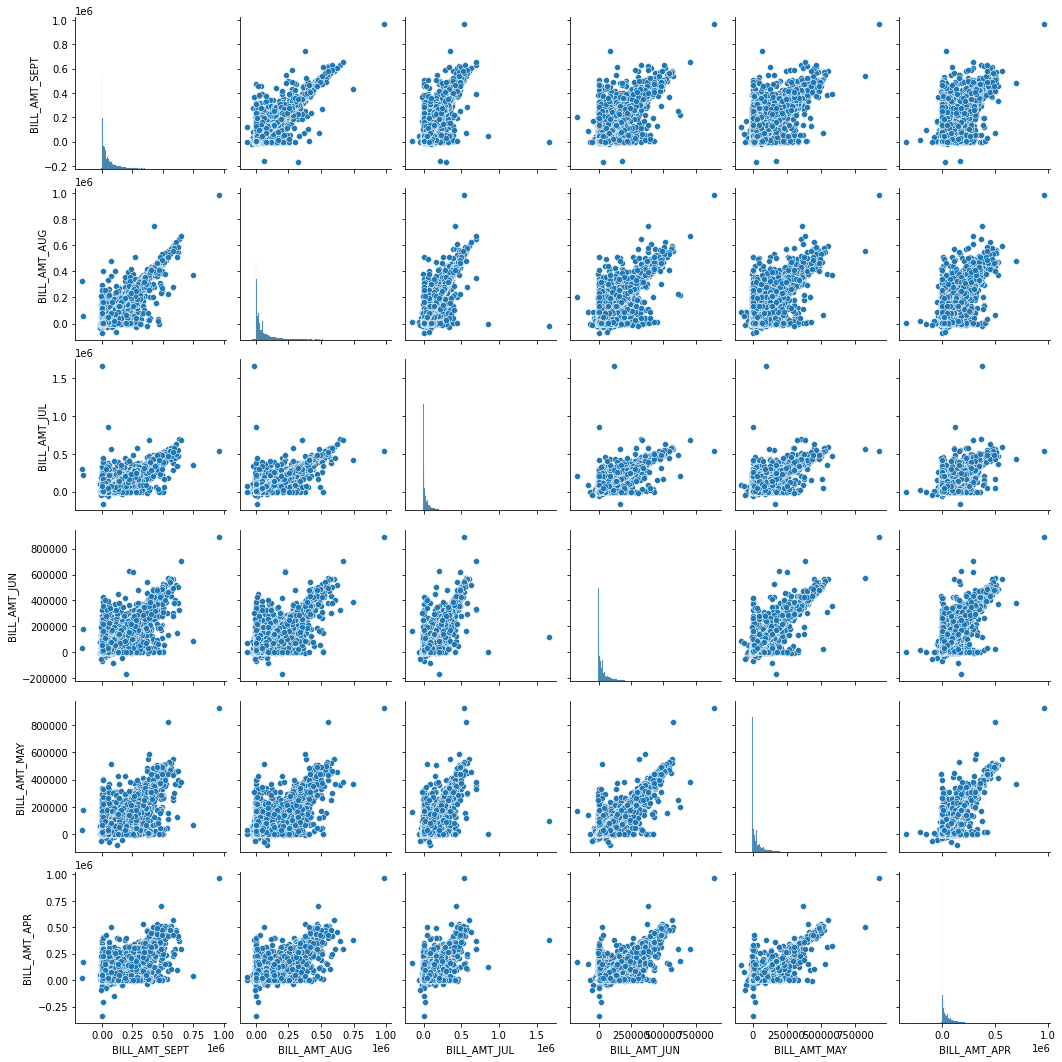

In [32]:
bill_amnt_df = df[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']]
sns.pairplot(data = bill_amnt_df)

History / Previous Payments

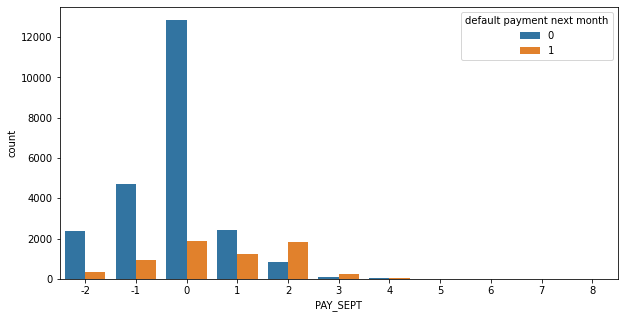

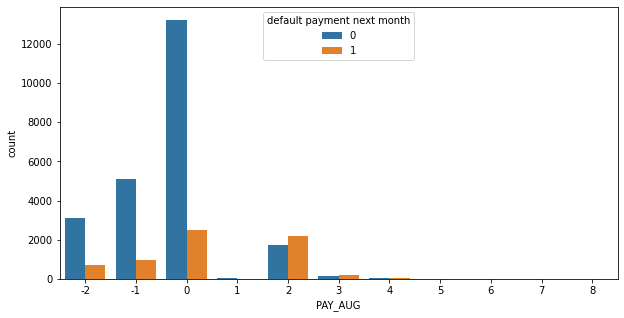

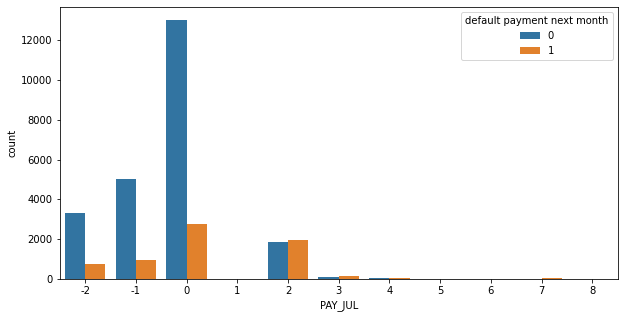

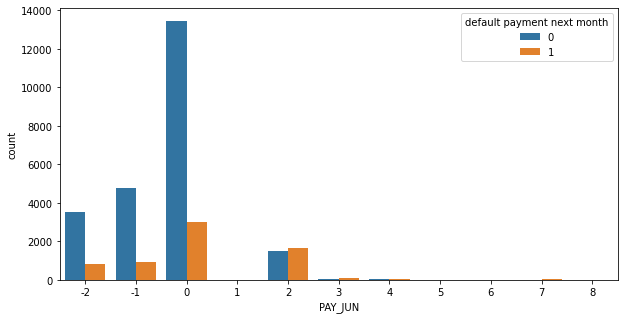

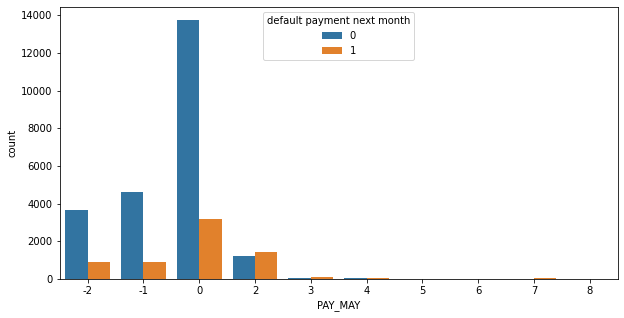

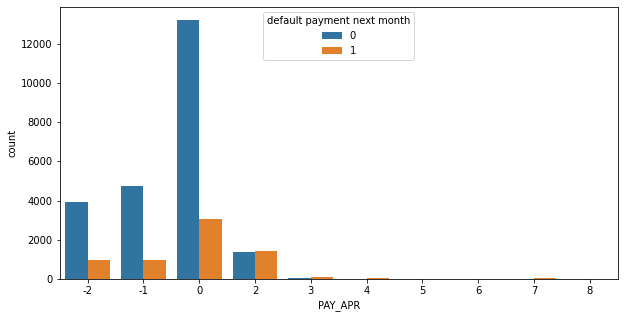

In [33]:
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default payment next month', data = df)

Completed / Paid Amount

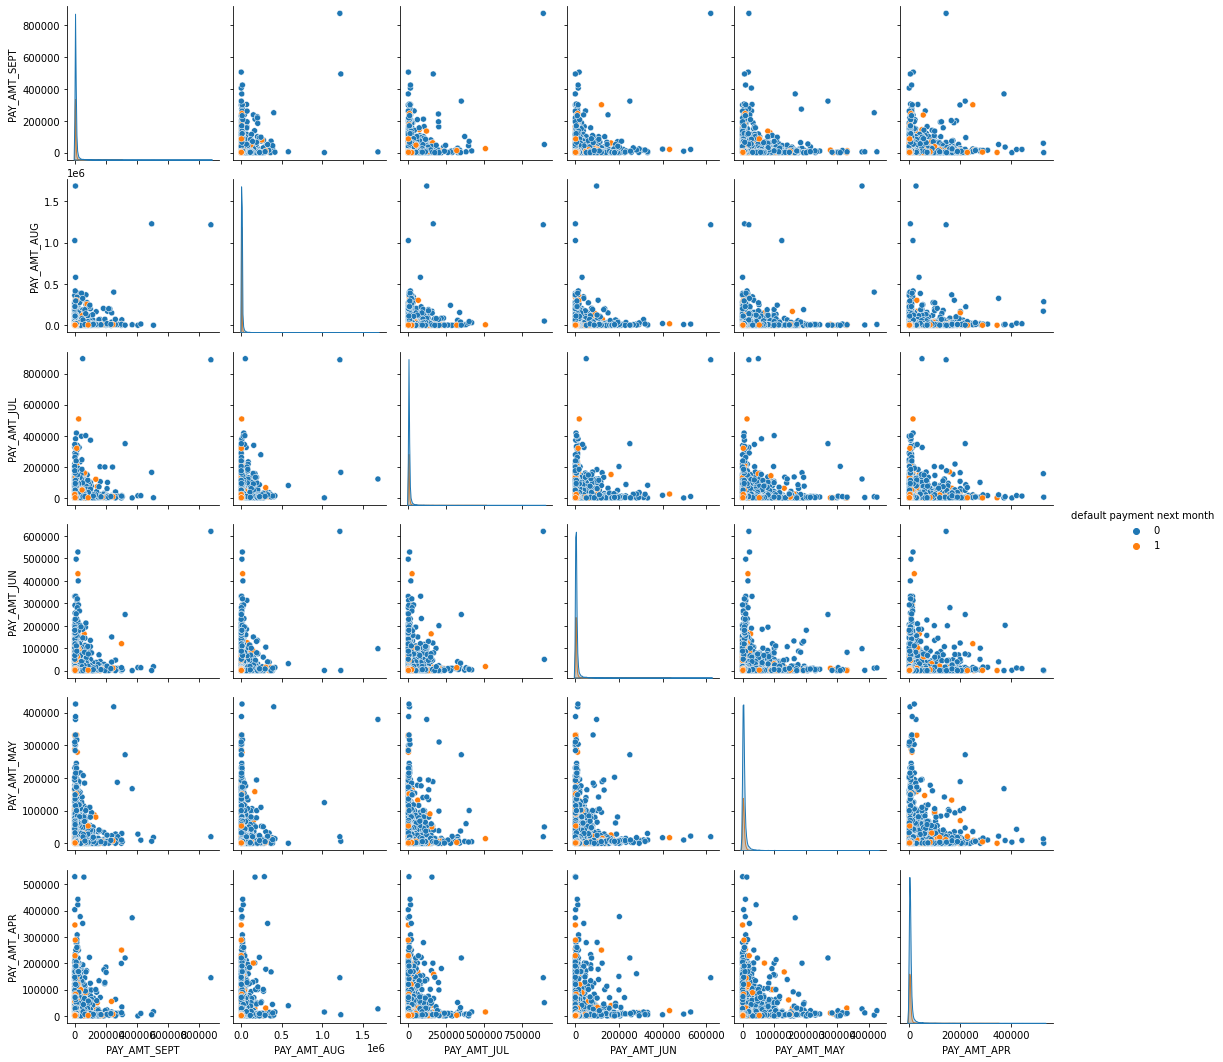

In [34]:
pay_amnt_df = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'default payment next month']]

sns.pairplot(data = pay_amnt_df, hue='default payment next month')

# Checking Correlations

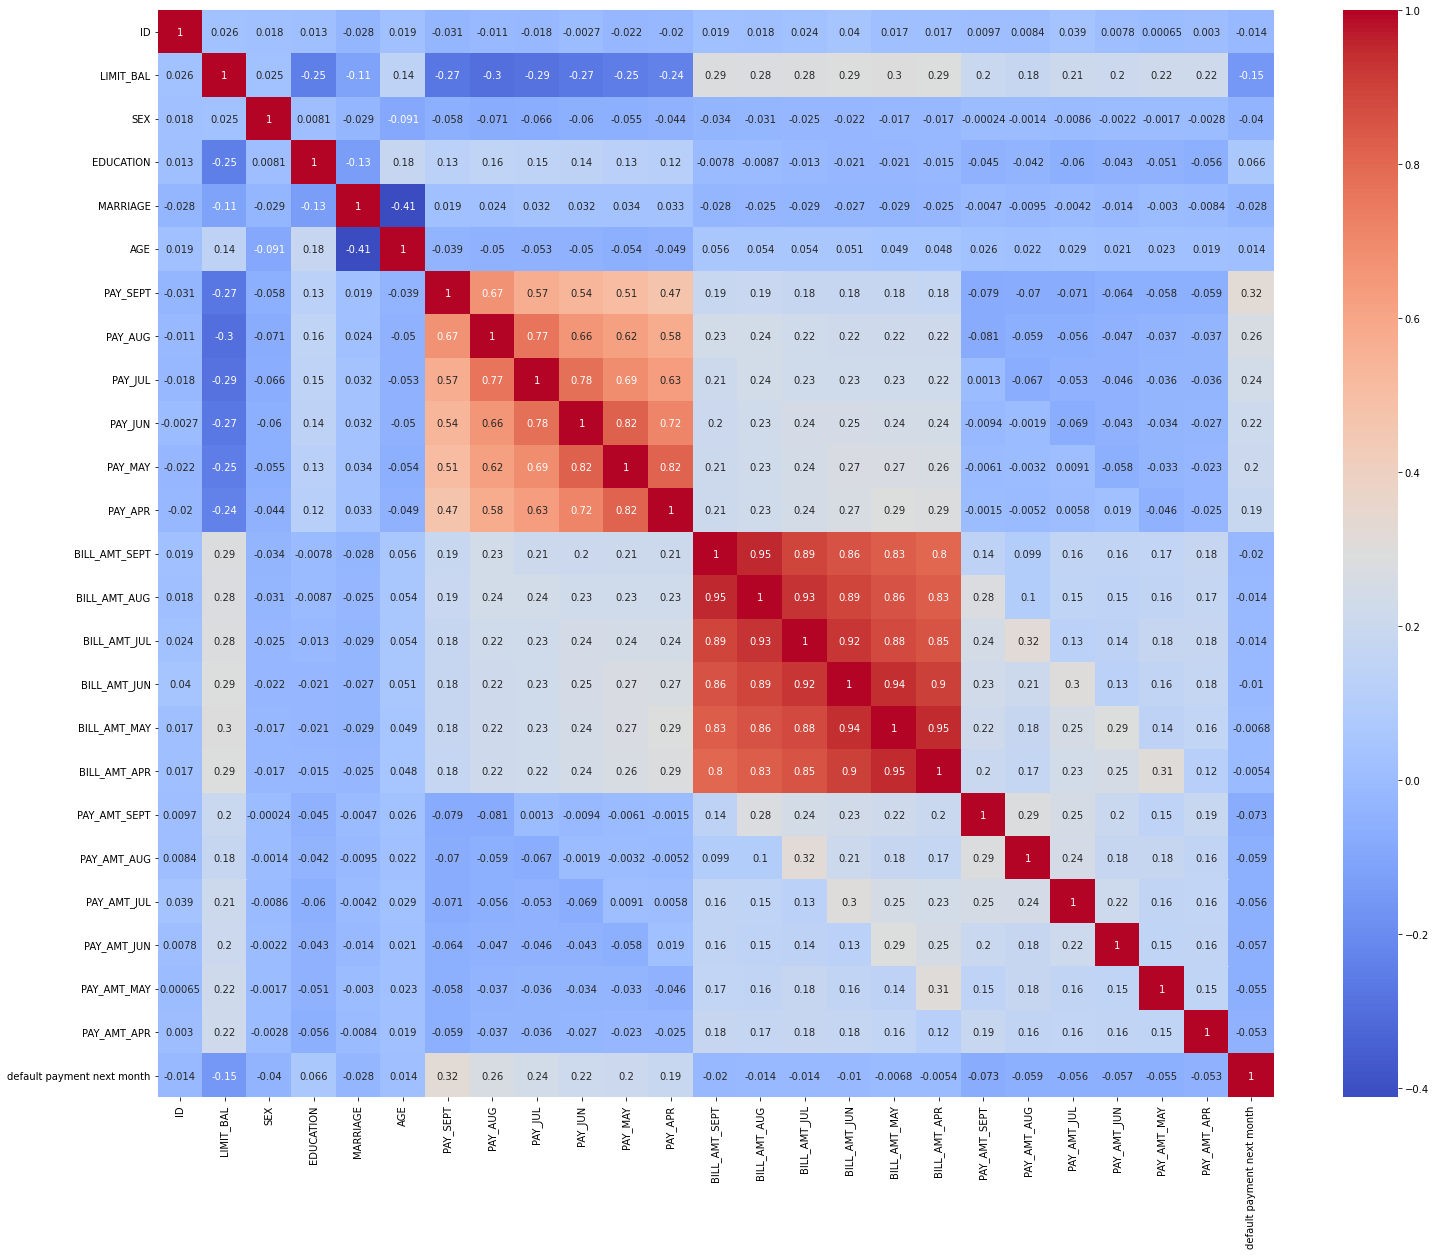

In [35]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

# SMOTE (Synthetic Minority Oversampling Technique)

In [36]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['default payment next month'])

print('Original shape of Dataset', len(df))
print('Resampled shape of Dataset', len(y_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Original shape of Dataset 30000
Resampled shape of Dataset 46728


In [37]:
columns = list(df.columns)
columns.pop()

'default payment next month'

In [38]:
balance_df = pd.DataFrame(x_smote, columns=columns)
balance_df['default payment next month'] = y_smote

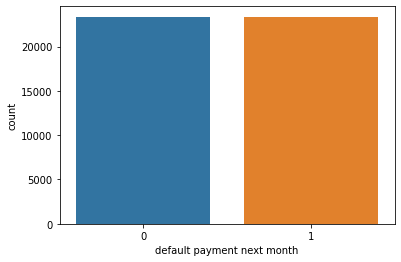

In [39]:
sns.countplot('default payment next month', data = balance_df)

In [40]:
balance_df[balance_df['default payment next month']==1]

ID  LIMIT_BAL  ...  PAY_AMT_APR  default payment next month
0          1      20000  ...            0                           1
1          2     120000  ...         2000                           1
13        14      70000  ...            0                           1
16        17      20000  ...            0                           1
21        22     120000  ...            0                           1
...      ...        ...  ...          ...                         ...
46723  21521     150000  ...         4377                           1
46724  17400      30000  ...          912                           1
46725   6138      50000  ...          602                           1
46726  12533      95228  ...         1710                           1
46727  23658     240000  ...           62                           1

[23364 rows x 25 columns]

# Feature Engineering

In [41]:
df_fr = balance_df.copy()

In [42]:
df_fr['Payement_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] + df_fr['PAY_APR']

df_fr.groupby('default payment next month')['Payement_Value'].mean()

default payment next month
0   -1.980140
1    1.653398
Name: Payement_Value, dtype: float64

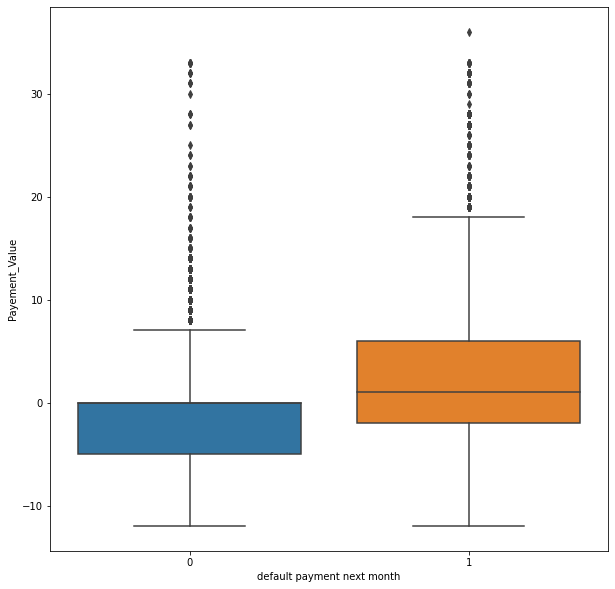

In [43]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_fr, x = 'default payment next month', y = 'Payement_Value' )

In [44]:
df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUN']+df_fr['PAY_AMT_JUL']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])

In [45]:
df_fr.groupby('default payment next month')['Dues'].mean()

default payment next month
0    187742.051532
1    191291.794256
Name: Dues, dtype: float64

In [46]:
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 6, 4, df_fr['EDUCATION'])
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 0, 4, df_fr['EDUCATION'])

In [47]:
print(df_fr['EDUCATION'].unique())
print(df_fr['MARRIAGE'].unique())

[2 1 3 4]
[1 2 3]


In [48]:
df_fr['MARRIAGE']=np.where(df_fr['MARRIAGE'] == 0, 3, df_fr['MARRIAGE'])

In [49]:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [50]:
df_fr.describe()

ID       LIMIT_BAL  ...  Payement_Value          Dues
count  46728.000000    46728.000000  ...    46728.000000  4.672800e+04
mean   14900.453368   153641.466894  ...       -0.163371  1.895169e+05
std     8433.653857   125742.963954  ...        6.038524  2.949615e+05
min        1.000000    10000.000000  ...      -12.000000 -2.848257e+06
25%     7701.000000    50000.000000  ...       -4.000000  2.261750e+03
50%    14881.500000   120000.000000  ...        0.000000  8.247050e+04
75%    22054.250000   220000.000000  ...        2.000000  2.373462e+05
max    30000.000000  1000000.000000  ...       36.000000  3.132149e+06

[8 rows x 24 columns]

In [51]:
df_fr.head(10)

ID  LIMIT_BAL     SEX  ... default payment next month Payement_Value     Dues
0   1      20000  FEMALE  ...                          1             -2     3913
1   2     120000  FEMALE  ...                          1              3    10352
2   3      90000  FEMALE  ...                          0              0    76608
3   4      50000  FEMALE  ...                          0              0   174713
4   5      50000    MALE  ...                          0             -2    44620
5   6      50000    MALE  ...                          0              0   173273
6   7     500000    MALE  ...                          0              0  2131813
7   8     100000  FEMALE  ...                          0             -3     8315
8   9     140000  FEMALE  ...                          0              2    44355
9  10      20000    MALE  ...                          0            -10    12790

[10 rows x 27 columns]

# One Hot Encoding

In [52]:
df_fr = pd.get_dummies(df_fr, columns=['EDUCATION','MARRIAGE'])

In [53]:
df_fr.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)

In [54]:
df_fr = pd.get_dummies(df_fr, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [55]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
df_fr = df_fr.replace(encoders_nums)

In [56]:
df_fr.drop('ID',axis = 1, inplace = True)

In [57]:
df_fr.head()

LIMIT_BAL  SEX  AGE  ...  PAY_APR_6  PAY_APR_7  PAY_APR_8
0      20000    0   24  ...          0          0          0
1     120000    0   26  ...          0          0          0
2      90000    0   34  ...          0          0          0
3      50000    0   37  ...          0          0          0
4      50000    1   57  ...          0          0          0

[5 rows x 83 columns]

In [58]:
df_fr.shape

(46728, 83)

# Logistic Regression

In [59]:
df_log_reg = df_fr.copy()

In [60]:
X = df_log_reg.drop(['default payment next month','Payement_Value','Dues'],axis=1)
y = df_log_reg['default payment next month']

In [61]:
columns = X.columns

In [62]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [64]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [65]:


grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)



Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    9.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [66]:
optimized_clf = grid_lr_clf.best_estimator_


In [67]:
grid_lr_clf.best_params_

{'C': 10, 'penalty': 'l2'}

In [68]:
grid_lr_clf.best_score_

0.7495130746964683

In [69]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [70]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

Model Evaluation

In [71]:


# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)



The accuracy on train data is  0.7510460919283227
The accuracy on test data is  0.7520264574281823


In [72]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7520264574281823
The precision on test data is  0.688715953307393
The recall on test data is  0.7885357885357885
The f1 on test data is  0.7352533924120742
The roc_score on test data is  0.7561304475083687


Confusion matrix

[[12784  2869]
 [ 4925 10729]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

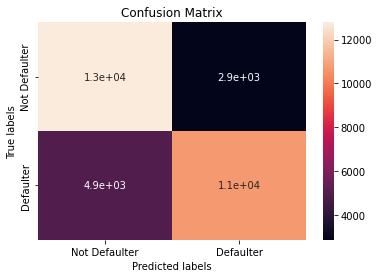

In [73]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [74]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [75]:


feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]



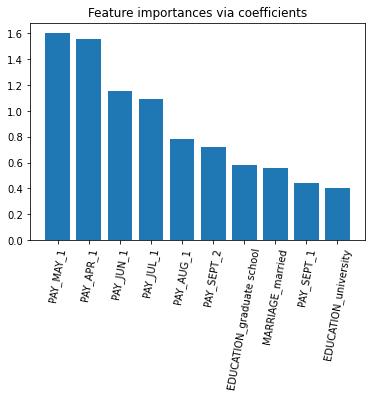

In [76]:


plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()



ROC AUC curve

In [77]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

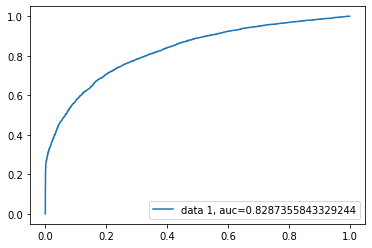

In [78]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Implementing SVC

In [85]:
# Parameter Range 
param_grid = {'C': [0.1, 1, 10, 100],   
              'kernel': ['rbf']}

In [86]:
X = df_fr.drop(['default payment next month','Payement_Value','Dues'],axis=1)
y = df_fr['default payment next month']

In [87]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [89]:
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 68.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [90]:
optimal_SVC_clf = grid_clf.best_estimator_

In [91]:


grid_clf.best_params_



{'C': 10, 'kernel': 'rbf'}

In [92]:
grid_clf.best_score_

0.7731497753681386

In [97]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [98]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7510460919283227
The accuracy on test data is  0.7520264574281823


In [99]:
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.7819207574087284
The precision on test data is  0.7107652399481194
The recall on test data is  0.8286707999395131
The f1 on test data is  0.7652028206381345
The roc_score on test data is  0.7877459358462324


[[13797  1856]
 [ 4196 11458]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

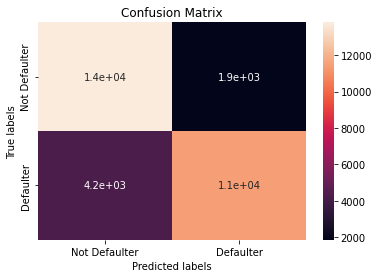

In [100]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [180]:
optimal_SVC_clf

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [181]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

ROC AUC curve

In [183]:
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]

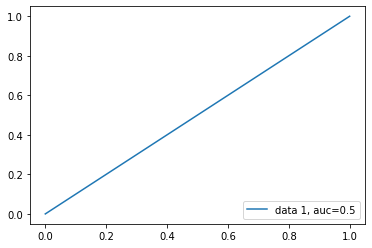

In [184]:


# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



# **Decision** **Tree**

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [109]:
X = df_fr.drop(['default payment next month','Payement_Value','Dues'],axis=1)
y = df_fr['default payment next month']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [111]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    7.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                       

In [112]:
grid_DTC_clf.best_score_

0.7076374465570723

In [113]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_

In [114]:
# Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [115]:


grid_DTC_clf.best_params_



{'max_depth': 20, 'min_samples_split': 0.1}

In [116]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  0.7101287252052256
The accuracy on test data is  0.7050126450943519


# **RandomForest**

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
X = df_fr.drop(['default payment next month','Payement_Value','Dues'],axis=1)
y = df_fr['default payment next month']

In [119]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [121]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9993292234963427
The accuracy on test data is  0.8344465339472148


In [122]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8344465339472148
The precision on test data is  0.8031128404669261
The recall on test data is  0.8567870485678705
The f1 on test data is  0.829082145009038
The roc_score on test data is  0.8357647715380236


We can see from above results that we are getting around 99% train accuracy and 83% for test accuracy which depicts that model is overfitting. However our f1-score is around 82%, which is not bad

In [123]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [124]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [125]:
grid_rf_clf.best_score_

0.8212860689066125

In [126]:
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 200}

In [127]:


optimal_rf_clf = grid_rf_clf.best_estimator_



In [128]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [129]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9988500974223017
The accuracy on test data is  0.8346410738603204


In [130]:


test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)



The accuracy on test data is  0.8346410738603204
The precision on test data is  0.8036316472114138
The recall on test data is  0.8567477876106194
The f1 on test data is  0.8293401151117654
The roc_score on test data is  0.8359328143084236


In [131]:
len(optimal_rf_clf.feature_importances_)

80

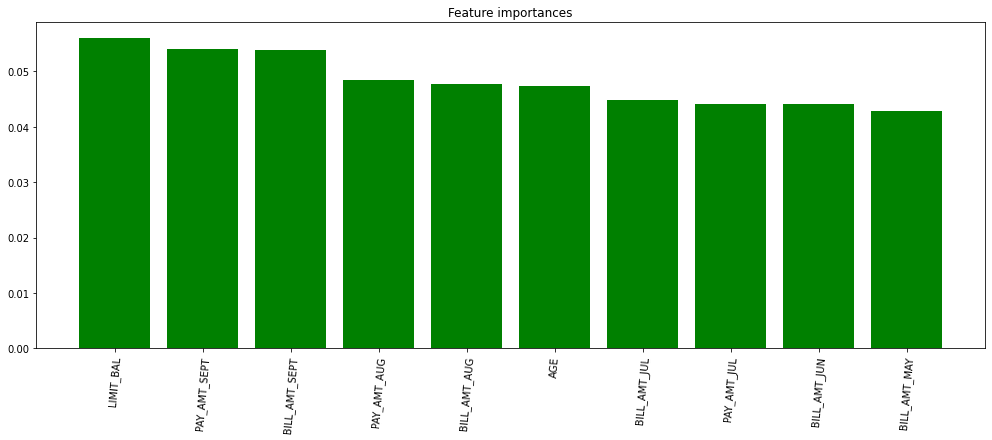

In [132]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="pink",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [172]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [173]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

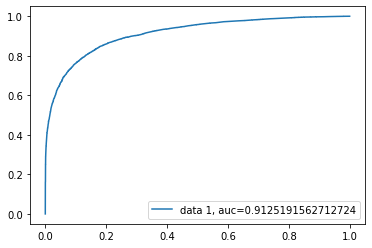

In [176]:


y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



# **XGBoost**

In [133]:
import lightgbm as lgb 
import xgboost as xgb

In [134]:
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [135]:
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [136]:
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

In [137]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(seconds=6, microseconds=503022)

In [138]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 
#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest)

In [139]:
len(train_class_preds_probs)

31307

In [140]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [141]:
test_class_preds_probs[:20]

array([0.2552193 , 0.23601547, 0.4009032 , 0.23036994, 0.2358156 ,
       0.29268524, 0.21423484, 0.3987175 , 0.63540936, 0.3205654 ,
       0.7611214 , 0.2884457 , 0.8638491 , 0.5219127 , 0.82984865,
       0.2615055 , 0.83469474, 0.50017005, 0.44956973, 0.24825914],
      dtype=float32)

In [142]:
test_class_preds[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0]

In [143]:
len(y_train)

31307

In [144]:


len(train_class_preds)



31307

In [145]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.7872360813875491
The accuracy on test data is  0.7734906945074898


In [146]:


test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)



The accuracy on test data is  0.7734906945074898
The precision on test data is  0.7040207522697796
The recall on test data is  0.8175930109956319
The f1 on test data is  0.756568401979232
The roc_score on train data is  0.7788716592213414


# **Hyperparameter** **Tuning**

In [147]:
from xgboost import  XGBClassifier

In [148]:
X = df_fr.drop(['default payment next month','Payement_Value','Dues'],axis=1)
y = df_fr['default payment next month']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [150]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1,iid=False, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  5.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=F

In [151]:
gsearch1.best_score_

0.8230109564468183

In [152]:
optimal_xgb = gsearch1.best_estimator_optimal_xgb = gsearch1.best_estimator_

In [153]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [155]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.9164723544255279
The accuracy on test data is  0.8304260424097011


In [156]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.8304260424097011
The precision on test data is  0.7913099870298314
The recall on test data is  0.8584494160686647
The f1 on test data is  0.8235135317540663
The roc_score on train data is  0.8324602144091218


In [157]:
pd.DataFrame(optimal_xgb.feature_importances_,index = columns,columns=['importance_xgb']).sort_values('importance_xgb',ascending=False)[:10]

importance_xgb
PAY_AUG_1               0.178498
PAY_JUL_1               0.101308
PAY_AUG_2               0.073819
PAY_JUN_1               0.061770
PAY_SEPT_2              0.057729
PAY_MAY_1               0.047893
PAY_APR_1               0.047331
SEX                     0.033769
MARRIAGE_married        0.027007
PAY_SEPT_1              0.025486

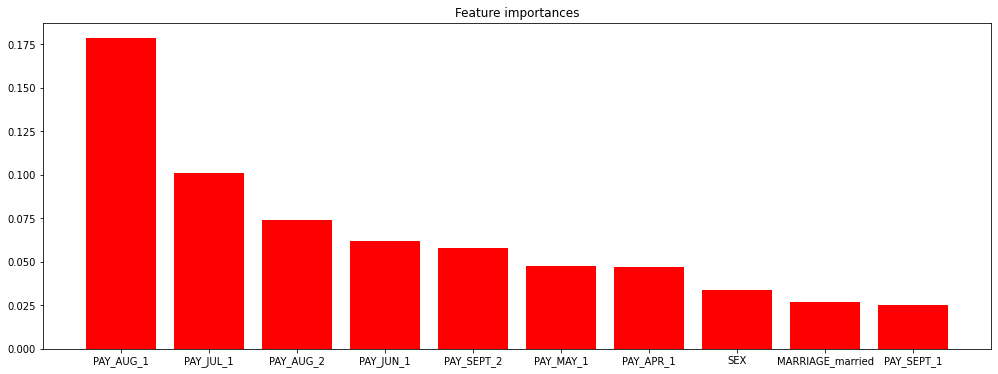

In [165]:


# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,index = columns,columns=['importance_xgb']).sort_values('importance_xgb',ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="r",  align="center")
# plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()



In [177]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

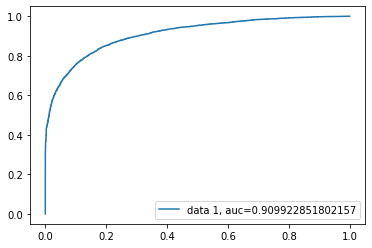

In [178]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# CatBoost

In [187]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 21 kB/s 


In [188]:
from catboost import CatBoostClassifier

In [189]:
cb_model=CatBoostClassifier(verbose=0)

In [193]:
(cb_model,X_test, X_train, y_test, y_train)

(<catboost.core.CatBoostClassifier at 0x7f2d71ede690>,
        LIMIT_BAL  SEX  AGE  ...  PAY_APR_6  PAY_APR_7  PAY_APR_8
 5263      180000    0   33  ...          0          0          0
 10357     190000    0   48  ...          0          0          0
 15309     140000    0   39  ...          0          0          0
 19240     380000    0   44  ...          0          0          0
 24477     280000    1   31  ...          0          0          0
 ...          ...  ...  ...  ...        ...        ...        ...
 21519      70000    0   33  ...          0          0          0
 32791     240000    1   42  ...          0          0          0
 25344      80000    0   22  ...          0          0          0
 23346     240000    0   33  ...          0          0          0
 33322      82672    1   32  ...          0          0          0
 
 [15421 rows x 80 columns],
        LIMIT_BAL  SEX  AGE  ...  PAY_APR_6  PAY_APR_7  PAY_APR_8
 26888     360000    1   33  ...          0          0   

In [194]:
cb_model=CatBoostClassifier()

In [195]:
# finding the best parameters for XGBRegressor by gridsearchcv
cat_para={'n_estimators': [100,125,150],'max_depth': [7,10,15]}
cat_grid=GridSearchCV(estimator=cb_model,param_grid=cat_para,cv=3,scoring='recall',verbose=3,n_jobs=-1)

In [196]:
(cat_grid,X_test, X_train, y_test, y_train)

(GridSearchCV(cv=3, error_score=nan,
              estimator=<catboost.core.CatBoostClassifier object at 0x7f2d54d05310>,
              iid='deprecated', n_jobs=-1,
              param_grid={'max_depth': [7, 10, 15],
                          'n_estimators': [100, 125, 150]},
              pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
              scoring='recall', verbose=3),
        LIMIT_BAL  SEX  AGE  ...  PAY_APR_6  PAY_APR_7  PAY_APR_8
 5263      180000    0   33  ...          0          0          0
 10357     190000    0   48  ...          0          0          0
 15309     140000    0   39  ...          0          0          0
 19240     380000    0   44  ...          0          0          0
 24477     280000    1   31  ...          0          0          0
 ...          ...  ...  ...  ...        ...        ...        ...
 21519      70000    0   33  ...          0          0          0
 32791     240000    1   42  ...          0          0          0
 25344  

# Evaluating the models

In [166]:
recall_score

<function sklearn.metrics._classification.recall_score>

In [167]:


classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_tuned]



In [168]:


pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })



Classifier  Train Accuracy  ...  Recall Score  F1 Score
0  Logistic Regression        0.751046  ...      0.788536  0.735253
1                  SVC        0.806689  ...      0.828671  0.765203
2    Random Forest CLf        0.998850  ...      0.856748  0.829340
3          Xgboost Clf        0.916472  ...      0.858449  0.823514

[4 rows x 6 columns]

# **Plotting ROC AUC for all the models**

In [185]:
classifiers_proba = [(optimized_clf, y_preds_proba_lr), 
               (optimal_rf_clf, y_preds_proba_rf), 
               (optimal_xgb, y_preds_proba_xgb),
               (optimal_SVC_clf,y_pred_proba_SVC)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

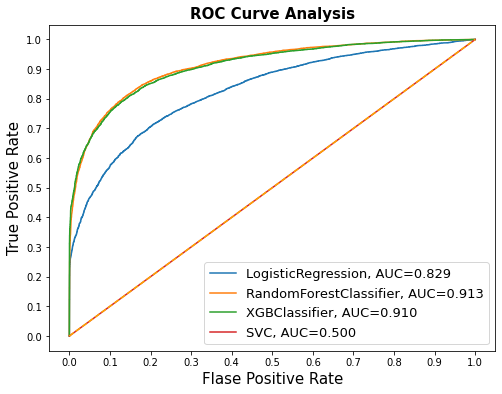

In [186]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()